In [1]:
# We can load the built in datasets from this function
from tensorflow.keras.datasets import mnist

# loads the MNIST training and test dataset 
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# Check to see if we're using the GPU
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

# Display the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape))

# Print the number of samples in our data
print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))

# Print the image dimensions and no. of labels in our Training and Test Data
print("\n")
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print("\n")
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1716008118638335124
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16266690560
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2075716173532543518
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
xla_global_id: 416903419
]
Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)


Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


In [2]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our data in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our data thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

from tensorflow.keras.utils import to_categorical

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Number of Classes: 10


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
batch_size = 128
epochs = 10

# Store our results here so we can plot later
# In our fit function we specify our datsets (x_train & y_train), 
# the batch size (typically 16 to 128 depending on your RAM), the number of 
# epochs (usually 10 to 100) and our validation datasets (x_test & y_test)
# verbose = 1, sets our training to output performance metrics every epoch
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# We obtain our accuracy score using the evalute function
# Score holds two values, our Test loss and Accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2048 - loss: 2.2689 - val_accuracy: 0.5427 - val_loss: 2.0964
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6083 - loss: 1.9447 - val_accuracy: 0.7938 - val_loss: 1.1358
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8114 - loss: 0.9253 - val_accuracy: 0.8702 - val_loss: 0.5194
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8677 - loss: 0.5007 - val_accuracy: 0.8914 - val_loss: 0.4004
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8856 - loss: 0.4090 - val_accuracy: 0.9003 - val_loss: 0.3526
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8947 - loss: 0.3643 - val_accuracy: 0.9074 - val_loss: 0.3279
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9021 - loss: 0.3381 - val_accuracy: 0.9119 - val_loss: 0.3081
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9071 - loss: 0.3197 - val_accuracy: 0.

**Get the shapes of only our conv filter**

In [6]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'conv2d': <Conv2D name=conv2d, built=True>,
 'conv2d_1': <Conv2D name=conv2d_1, built=True>,
 'max_pooling2d': <MaxPooling2D name=max_pooling2d, built=True>,
 'flatten': <Flatten name=flatten, built=True>,
 'dense': <Dense name=dense, built=True>,
 'dense_1': <Dense name=dense_1, built=True>}

In [7]:
# summarize filter shapes
for layer in model.layers:
  # check for convolutional layer
  
  if 'conv' not in layer.name:
    continue

  # get filter weights
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

conv2d (3, 3, 1, 32)
conv2d_1 (3, 3, 32, 64)


In [8]:
# retrieve weights from the first Conv (hidden) layer
filters, biases = model.layers[0].get_weights()

In [9]:
# Let's take a look at our filters
print(filters.shape)
filters

(3, 3, 1, 32)


array([[[[-0.1113957 , -0.03786416, -0.0600156 , -0.06253742,
          -0.02999984,  0.02066426, -0.07145759,  0.1496952 ,
           0.23967186, -0.08077145,  0.03187815,  0.15458237,
          -0.06940398,  0.14088728,  0.21109563, -0.07307337,
          -0.13022783,  0.01592108, -0.00199506,  0.02089635,
           0.01516044, -0.1369204 ,  0.09063588,  0.07177586,
           0.19771263, -0.03742998,  0.07319542,  0.21359266,
           0.19724648, -0.09317208,  0.11937058,  0.08389405]],

        [[-0.02884506, -0.01441411, -0.07872184,  0.13086054,
          -0.0681981 , -0.08160341,  0.03533595,  0.05594964,
           0.31197006,  0.01799013, -0.06537428,  0.24124351,
          -0.09688122, -0.08045277,  0.00829801, -0.1302599 ,
           0.02451628,  0.13424255, -0.13182081, -0.02903231,
           0.14546268,  0.02079402,  0.00124697, -0.11514325,
           0.17823482,  0.09666822,  0.12132577,  0.06887808,
           0.11605117,  0.07659562,  0.06092241, -0.10947202]],

  

## **Let's normalize filter values to 0-1 so we can visualize them**

Our Filter weights range

In [10]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
print(f'Before Normalisation, Min = {f_min} and Max =  {f_max}')
filters = (filters - f_min) / (f_max - f_min)
print(f'After Normalisation, Min = {filters.min()} and Max =  {filters.max()}')

Before Normalisation, Min = -0.14568789303302765 and Max =  0.3643617630004883
After Normalisation, Min = 0.0 and Max =  1.0


## **Visualize our Trained Fillters**

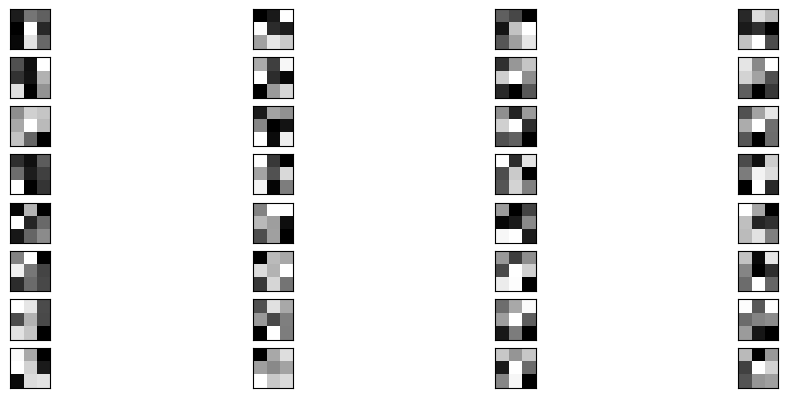

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# plot first few filters and set plot size
n_filters, ix = 32, 1
plt.figure(figsize=(12,20))

for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    #print(f.shape)

    # Arrange in subplot of 4 x 8
    ax = plt.subplot(n_filters, 4, ix)
    ax.set_xticks([])
    ax.set_yticks([])

    # plot filter channel in grayscale
    plt.imshow(np.squeeze(f, axis=2), cmap='gray')
    ix += 1
    
# show the figure
plt.show()

**Filter Activation**

In [27]:
from tensorflow.keras.models import Model

# Extracts the outputs of the top 2 layers
layer_outputs = [layer.output for layer in model.layers[:2]]

# Creates a model that will return these outputs, given the model input
activation_model = Model(inputs=model.inputs, outputs=layer_outputs)

In [28]:
layer_outputs

[<KerasTensor shape=(None, 26, 26, 32), dtype=float32, sparse=False, name=keras_tensor_23>,
 <KerasTensor shape=(None, 24, 24, 64), dtype=float32, sparse=False, name=keras_tensor_25>]

(-0.5, 27.5, 27.5, -0.5)

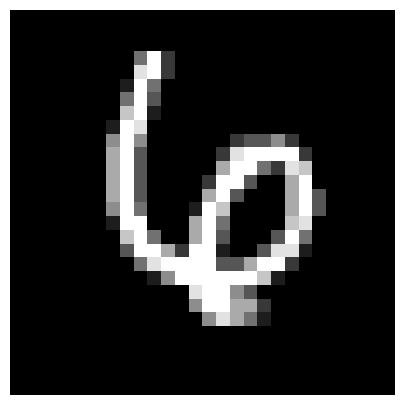

In [29]:
import matplotlib.pyplot as plt

img_tensor = x_test[22].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img_tensor[0,:,:,0],cmap="gray")
plt.axis('off')

In [26]:
model.inputs

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=None, name=keras_tensor_22>]

## **Get the output after the 2nd Conv Filter (after ReLU)**

In [30]:
# Returns a list of two Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

print("Number of layer activations: " + str(len(activations)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Number of layer activations: 2


In [31]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 32)


In [32]:
second_layer_activation = activations[1]
print(second_layer_activation.shape)

(1, 24, 24, 64)


In [33]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,884 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


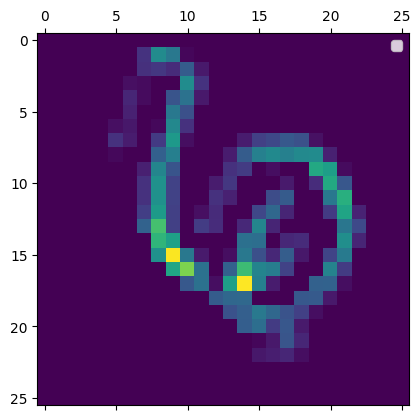

In [34]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.legend()

## **Create a function that displys the activations of specific layers**

In [35]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='viridis')
            activation_index += 1

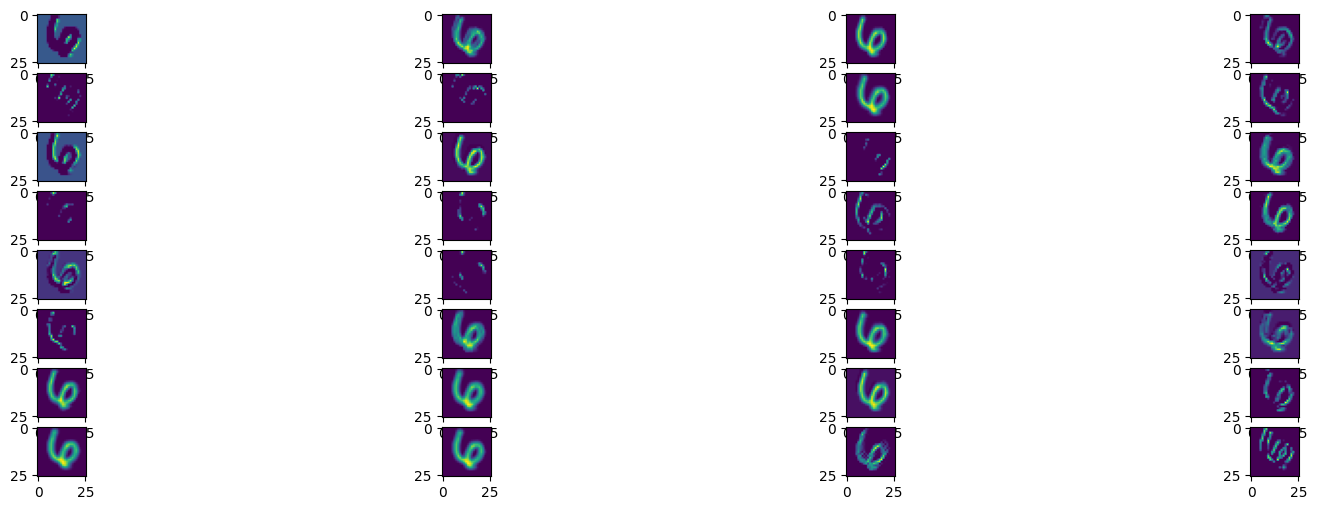

In [36]:
display_activation(activations, 4, 8, 0)